In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy
import cv2
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
import os.path
from os import path
import shutil
shutil.rmtree('/kaggle/working', ignore_errors=True)
os.makedirs('/kaggle/working/spectrograms')
os.makedirs('/kaggle/working/tempograms')
os.makedirs('/kaggle/working/tonnetzgrams')
os.makedirs('/kaggle/working/spectral_contrastgrams')
os.makedirs('/kaggle/working/chromagrams')

**1.Spectrogram**

/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Error loading file:
Error message:


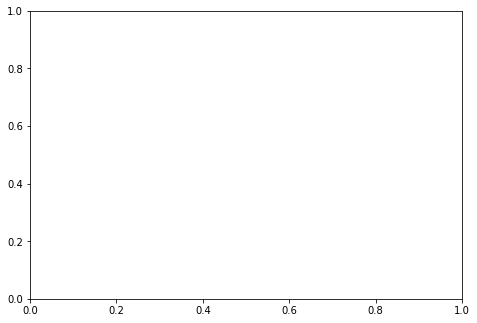

In [5]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
    
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

for files in os.listdir("/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original"):
    try:
        str=os.path.join("/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original", files)
        create_pngs_from_wavs(str, '/kaggle/working/spectrograms/'+files)
    except Exception as e:
        print("Error loading file:")
        print("Error message:")

In [20]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.utils import to_categorical
def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        try:
            images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
            if(label=="blues"):
                labels.append(0)
            elif(label=="classical"):
                labels.append(1)
            elif(label=="country"):
                labels.append(2)
            elif(label=="disco"):
                labels.append(3)
            elif(label=="hiphop"):
                labels.append(4)
            elif(label=="jazz"):
                labels.append(5)
            elif(label=="metal"):
                labels.append(6)
            elif(label=="pop"):
                labels.append(7)
            elif(label=="reggae"):
                labels.append(8)
            elif(label=="rock"):
                labels.append(9)
        except Exception as e:
            print("Error loading file:")
            print("Error message:")
    return images, labels
i=0
x=[]
y=[]
for genre in os.listdir("/kaggle/working/spectrograms"):
    print(genre)
    genre_path = os.path.join("/kaggle/working/spectrograms", genre)
    file_count = 0
    images=[]
    labels=[]
    images, labels = load_images_from_path(genre_path, genre)
    #show_images(images)
    x += images
    y += labels
    i=i+1
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x_train_norm = preprocess_input(np.array(x_train))
x_test_norm = preprocess_input(np.array(x_test))
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)
train_features = base_model.predict(x_train_norm)
test_features = base_model.predict(x_test_norm)
model = Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


classical
metal
rock
hiphop
country
jazz
reggae
disco
pop
blues


In [21]:
hist = model.fit(train_features, y_train_encoded, validation_data=(test_features, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
65/65 [==============================] - 15s 217ms/step - loss: 40.4767 - accuracy: 0.3076 - val_loss: 4.7261 - val_accuracy: 0.5432
Epoch 2/10
65/65 [==============================] - 14s 218ms/step - loss: 1.4486 - accuracy: 0.7634 - val_loss: 4.3729 - val_accuracy: 0.6151
Epoch 3/10
65/65 [==============================] - 14s 213ms/step - loss: 1.3872 - accuracy: 0.8214 - val_loss: 2.5007 - val_accuracy: 0.6835
Epoch 4/10
65/65 [==============================] - 14s 218ms/step - loss: 0.3454 - accuracy: 0.9258 - val_loss: 2.4853 - val_accuracy: 0.6763
Epoch 5/10
65/65 [==============================] - 14s 213ms/step - loss: 0.1730 - accuracy: 0.9503 - val_loss: 2.9912 - val_accuracy: 0.6835
Epoch 6/10
65/65 [==============================] - 14s 218ms/step - loss: 0.1046 - accuracy: 0.9775 - val_loss: 2.7288 - val_accuracy: 0.7086
Epoch 7/10
65/65 [==============================] - 14s 213ms/step - loss: 0.2006 - accuracy: 0.9477 - val_loss: 3.4177 - val_accuracy: 0.654

In [22]:
create_spectrogram('/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00000.wav', '/kaggle/working/soso1.png')
class_labels = ['blues', 'classical', 'country', 'disco','hiphop','jazz','metal','pop','reggae','rock']

x = image.load_img('/kaggle/working/soso1.png', target_size=(224, 224))
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model.predict(x)
predictions = model.predict(y)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

blues: 1.1867142468355296e-12
classical: 0.9978988170623779
country: 6.298153597569059e-18
disco: 0.0021012083161622286
hiphop: 3.451485787713676e-14
jazz: 7.917481947838922e-11
metal: 2.741552916374825e-22
pop: 5.780676230595938e-19
reggae: 7.502290664547279e-21
rock: 1.8780121902040037e-10


**2.Tempogram**

/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Error loading file:
Error message:
9412608/9406464 [==============================] - 0s 0us/step
Epoch 1/10
65/65 [==============================] - 18s 267ms/step - loss: 59.3266 - accuracy: 0.1650 - val_loss: 3.7705 - val_accuracy: 0.3094
Epoch 2/10
65/65 [==============================] - 16s 250ms/step - loss: 2.5721 - accuracy: 0.4256 - val_loss: 3.5958 - val_accuracy: 0.3058
Epoch 3/10
65/65 [==============================] - 16s 253ms/step - loss: 1.8188 - accuracy: 0.5398 - val_loss: 2.2637 - val_accuracy: 0.3993
Epoch 4/10
65/65 [==============================] - 16s 250ms/step - loss: 0.8347 - accuracy: 0.7005 - val_loss: 2.7766 - val_accuracy: 0.3561
Epoch 5/10
65/65 [==============================] - 17s 256ms/step - loss: 0.8941 - accuracy: 0.7121 - val_loss: 2.3944 - val_accuracy: 0.4065
Epoch 6/10
65/65 [==============================] - 17s 257ms/step - loss: 0.6512 - accuracy: 0.7601 - val_loss: 2.6483 - val_accuracy: 0.3453
Epoch 7/10
65/65 [=========================

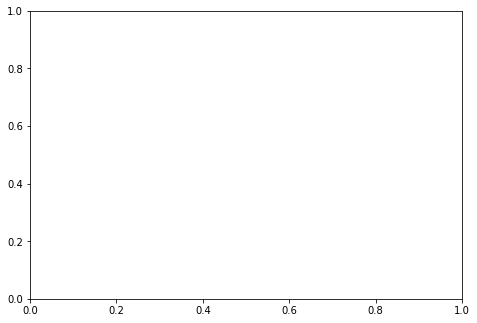

In [3]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline

def create_tempogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.tempogram(y, sr=sr)
    librosa.display.specshow(ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
    
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_tempogram(input_file, output_file)

for files in os.listdir("/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original"):
    try:
        str=os.path.join("/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original", files)
        create_pngs_from_wavs(str, '/kaggle/working/tempograms/'+files)
    except Exception as e:
        print("Error loading file:")
        print("Error message:")
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.utils import to_categorical
def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        try:
            images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
            if(label=="blues"):
                labels.append(0)
            elif(label=="classical"):
                labels.append(1)
            elif(label=="country"):
                labels.append(2)
            elif(label=="disco"):
                labels.append(3)
            elif(label=="hiphop"):
                labels.append(4)
            elif(label=="jazz"):
                labels.append(5)
            elif(label=="metal"):
                labels.append(6)
            elif(label=="pop"):
                labels.append(7)
            elif(label=="reggae"):
                labels.append(8)
            elif(label=="rock"):
                labels.append(9)
        except Exception as e:
            print("Error loading file:")
            print("Error message:")
    return images, labels
i=0
x=[]
y=[]
for genre in os.listdir("/kaggle/working/tempograms"):
    genre_path = os.path.join("/kaggle/working/tempograms", genre)
    file_count = 0
    images=[]
    labels=[]
    images, labels = load_images_from_path(genre_path, genre)
    #show_images(images)
    x += images
    y += labels
    i=i+1
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x_train_norm = preprocess_input(np.array(x_train))
x_test_norm = preprocess_input(np.array(x_test))
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)
train_features = base_model.predict(x_train_norm)
test_features = base_model.predict(x_test_norm)
model = Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_features, y_train_encoded, validation_data=(test_features, y_test_encoded), batch_size=10, epochs=10)

In [4]:
create_tempogram('/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00000.wav', '/kaggle/working/soso1.png')
class_labels = ['blues', 'classical', 'country', 'disco','hiphop','jazz','metal','pop','reggae','rock']

x = image.load_img('/kaggle/working/soso1.png', target_size=(224, 224))
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model.predict(x)
predictions = model.predict(y)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

blues: 0.0007549335132353008
classical: 0.9901818633079529
country: 0.0003648994315881282
disco: 4.527767487161327e-06
hiphop: 4.146677383687347e-05
jazz: 1.562741317684413e-06
metal: 0.00023341939959209412
pop: 0.0009509099763818085
reggae: 1.4909044693922624e-05
rock: 0.007451566401869059


**3.Tonnetzgram**

/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Error loading file:
Error message:
Epoch 1/10
65/65 [==============================] - 17s 253ms/step - loss: 45.2285 - accuracy: 0.1624 - val_loss: 6.1271 - val_accuracy: 0.2842
Epoch 2/10
65/65 [==============================] - 16s 245ms/step - loss: 2.8903 - accuracy: 0.4474 - val_loss: 4.2145 - val_accuracy: 0.2626
Epoch 3/10
65/65 [==============================] - 16s 249ms/step - loss: 1.1827 - accuracy: 0.6712 - val_loss: 3.2598 - val_accuracy: 0.2914
Epoch 4/10
65/65 [==============================] - 16s 245ms/step - loss: 0.5127 - accuracy: 0.8332 - val_loss: 3.7034 - val_accuracy: 0.2878
Epoch 5/10
65/65 [==============================] - 16s 250ms/step - loss: 0.5639 - accuracy: 0.8442 - val_loss: 2.9436 - val_accuracy: 0.3957
Epoch 6/10
65/65 [==============================] - 16s 245ms/step - loss: 0.1444 - accuracy: 0.9519 - val_loss: 2.6753 - val_accuracy: 0.3741
Epoch 7/10
65/65 [==============================] - 16s 249ms/step - loss: 0.0738 - accuracy: 0.9791 - val

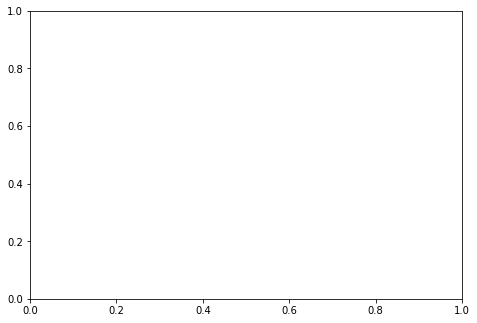

In [5]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline

def create_tonnetzgram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.tonnetz(y, sr=sr)
    librosa.display.specshow(ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
    
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_tonnetzgram(input_file, output_file)

for files in os.listdir("/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original"):
    try:
        str=os.path.join("/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original", files)
        create_pngs_from_wavs(str, '/kaggle/working/tonnetzgrams/'+files)
    except Exception as e:
        print("Error loading file:")
        print("Error message:")
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.utils import to_categorical
def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        try:
            images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
            if(label=="blues"):
                labels.append(0)
            elif(label=="classical"):
                labels.append(1)
            elif(label=="country"):
                labels.append(2)
            elif(label=="disco"):
                labels.append(3)
            elif(label=="hiphop"):
                labels.append(4)
            elif(label=="jazz"):
                labels.append(5)
            elif(label=="metal"):
                labels.append(6)
            elif(label=="pop"):
                labels.append(7)
            elif(label=="reggae"):
                labels.append(8)
            elif(label=="rock"):
                labels.append(9)
        except Exception as e:
            print("Error loading file:")
            print("Error message:")
    return images, labels
i=0
x=[]
y=[]
for genre in os.listdir("/kaggle/working/tonnetzgrams"):
    genre_path = os.path.join("/kaggle/working/tonnetzgrams", genre)
    file_count = 0
    images=[]
    labels=[]
    images, labels = load_images_from_path(genre_path, genre)
    #show_images(images)
    x += images
    y += labels
    i=i+1
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x_train_norm = preprocess_input(np.array(x_train))
x_test_norm = preprocess_input(np.array(x_test))
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)
train_features = base_model.predict(x_train_norm)
test_features = base_model.predict(x_test_norm)
model = Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_features, y_train_encoded, validation_data=(test_features, y_test_encoded), batch_size=10, epochs=10)

In [6]:
create_tonnetzgram('/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00000.wav', '/kaggle/working/soso1.png')
class_labels = ['blues', 'classical', 'country', 'disco','hiphop','jazz','metal','pop','reggae','rock']

x = image.load_img('/kaggle/working/soso1.png', target_size=(224, 224))
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model.predict(x)
predictions = model.predict(y)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

blues: 1.06711596004061e-07
classical: 0.999194324016571
country: 0.0006798551767133176
disco: 1.4043599549040664e-05
hiphop: 1.9845333709689328e-11
jazz: 2.664150429154688e-07
metal: 5.041590611654101e-07
pop: 3.690625089802779e-05
reggae: 1.707584971200049e-07
rock: 7.37819864298217e-05


**4.Chromagram**

In [ ]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline

def create_chromagram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.chroma_stft(y, sr=sr)
    librosa.display.specshow(ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
    
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_chromagram(input_file, output_file)

for files in os.listdir("/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original"):
    try:
        str=os.path.join("/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original", files)
        create_pngs_from_wavs(str, '/kaggle/working/chromagrams/'+files)
    except Exception as e:
        print("Error loading file:")
        print("Error message:")
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.utils import to_categorical
def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        try:
            images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
            if(label=="blues"):
                labels.append(0)
            elif(label=="classical"):
                labels.append(1)
            elif(label=="country"):
                labels.append(2)
            elif(label=="disco"):
                labels.append(3)
            elif(label=="hiphop"):
                labels.append(4)
            elif(label=="jazz"):
                labels.append(5)
            elif(label=="metal"):
                labels.append(6)
            elif(label=="pop"):
                labels.append(7)
            elif(label=="reggae"):
                labels.append(8)
            elif(label=="rock"):
                labels.append(9)
        except Exception as e:
            print("Error loading file:")
            print("Error message:")
    return images, labels
i=0
x=[]
y=[]
for genre in os.listdir("/kaggle/working/chromagrams"):
    genre_path = os.path.join("/kaggle/working/chromagrams", genre)
    file_count = 0
    images=[]
    labels=[]
    images, labels = load_images_from_path(genre_path, genre)
    #show_images(images)
    x += images
    y += labels
    i=i+1
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x_train_norm = preprocess_input(np.array(x_train))
x_test_norm = preprocess_input(np.array(x_test))
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)
train_features = base_model.predict(x_train_norm)
test_features = base_model.predict(x_test_norm)
model = Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_features, y_train_encoded, validation_data=(test_features, y_test_encoded), batch_size=10, epochs=10)

In [ ]:
create_chromagram('/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00000.wav', '/kaggle/working/soso1.png')
class_labels = ['blues', 'classical', 'country', 'disco','hiphop','jazz','metal','pop','reggae','rock']

x = image.load_img('/kaggle/working/soso1.png', target_size=(224, 224))
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model.predict(x)
predictions = model.predict(y)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

**5.Spectral_contrast**

In [ ]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline

def create_spectral(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.spectral_contrast(y, sr=sr)
    librosa.display.specshow(ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
    
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectral(input_file, output_file)

for files in os.listdir("/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original"):
    try:
        str=os.path.join("/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original", files)
        create_pngs_from_wavs(str, '/kaggle/working/spectral_contrastgrams/'+files)
    except Exception as e:
        print("Error loading file:")
        print("Error message:")
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.utils import to_categorical
def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        try:
            images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
            if(label=="blues"):
                labels.append(0)
            elif(label=="classical"):
                labels.append(1)
            elif(label=="country"):
                labels.append(2)
            elif(label=="disco"):
                labels.append(3)
            elif(label=="hiphop"):
                labels.append(4)
            elif(label=="jazz"):
                labels.append(5)
            elif(label=="metal"):
                labels.append(6)
            elif(label=="pop"):
                labels.append(7)
            elif(label=="reggae"):
                labels.append(8)
            elif(label=="rock"):
                labels.append(9)
        except Exception as e:
            print("Error loading file:")
            print("Error message:")
    return images, labels
i=0
x=[]
y=[]
for genre in os.listdir("/kaggle/working/spectral_contrastgrams"):
    genre_path = os.path.join("/kaggle/working/spectral_contrastgrams", genre)
    file_count = 0
    images=[]
    labels=[]
    images, labels = load_images_from_path(genre_path, genre)
    #show_images(images)
    x += images
    y += labels
    i=i+1
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x_train_norm = preprocess_input(np.array(x_train))
x_test_norm = preprocess_input(np.array(x_test))
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)
train_features = base_model.predict(x_train_norm)
test_features = base_model.predict(x_test_norm)
model = Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_features, y_train_encoded, validation_data=(test_features, y_test_encoded), batch_size=10, epochs=10)

In [ ]:
create_spectral('/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00000.wav', '/kaggle/working/soso1.png')
class_labels = ['blues', 'classical', 'country', 'disco','hiphop','jazz','metal','pop','reggae','rock']

x = image.load_img('/kaggle/working/soso1.png', target_size=(224, 224))
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model.predict(x)
predictions = model.predict(y)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')